In [68]:
import numpy as np
import pandas as pd
from warnings import warn

def linear_regression(x  :np.array, y : np.array, learning_rate=0.000001, epsilon=0.9) -> np.array:
    """Linear regression algorithm utilizing gradient decent

    Args:
        x (numpy.array): Array containing x values from dataset
        y (numpy.array): Array containing y valiues from dataset
        learning_rate (float, optional): learning rate value represented by alpha. Defaults to 0.0000001.
        epsilon (float, optional): error threshold to check for convergence. Defaults to 0.9.

    Returns:
         np.array: weights for linear regression
    """
    
    #insert column for y intercept
    regr = np.c_[x, np.ones(len(x))]
    
    #weights
    weights = np.ones(regr.shape[1])
    
    #gradient descent
    norm = 1
    while(norm > epsilon):
        # calculate partial derivitive
        prediction_y = regr @ weights.T
        # print(norm)
        part_deriv = regr.T @ (y - prediction_y)

        # calculate normal

        norm = np.sum(np.sqrt(np.square(part_deriv)))
        # adjust weights based on gradient

        weights = weights.T + (learning_rate * part_deriv)
        if (np.isnan(norm)):
          warn('diverged')

          
    return weights
def mean_squared_error(y, predection_y) -> float:
    """Get mean squared error

    Args:
        y (np.array): Values for y
        predection_y (np.array): Predicted values for y

    Returns:
        float: mean squared error
    """
    
    #sum of (y_n - pred_y_n) divided by num of y
    error = np.sum(np.square(y - predection_y))/float(len(y))
    
    return error
    
def predict_y(x:np.array, weights:np.array) -> np.array:
    """Predict y value

    Args:
        x (np.array): independant variables
        weights (np.array): linear regression weights

    Returns:
        np.array: predicted values
    """
  # y =       m      *    x          +     b
    y = weights[:-1] @ np.array(x).T + weights[-1]
    
    return y

In [69]:
# get data from file
data = pd.read_csv("Real estate.csv")
data = data.drop(["No"], axis=1)
data.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [71]:

data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<function matplotlib.pyplot.show(close=None, block=None)>

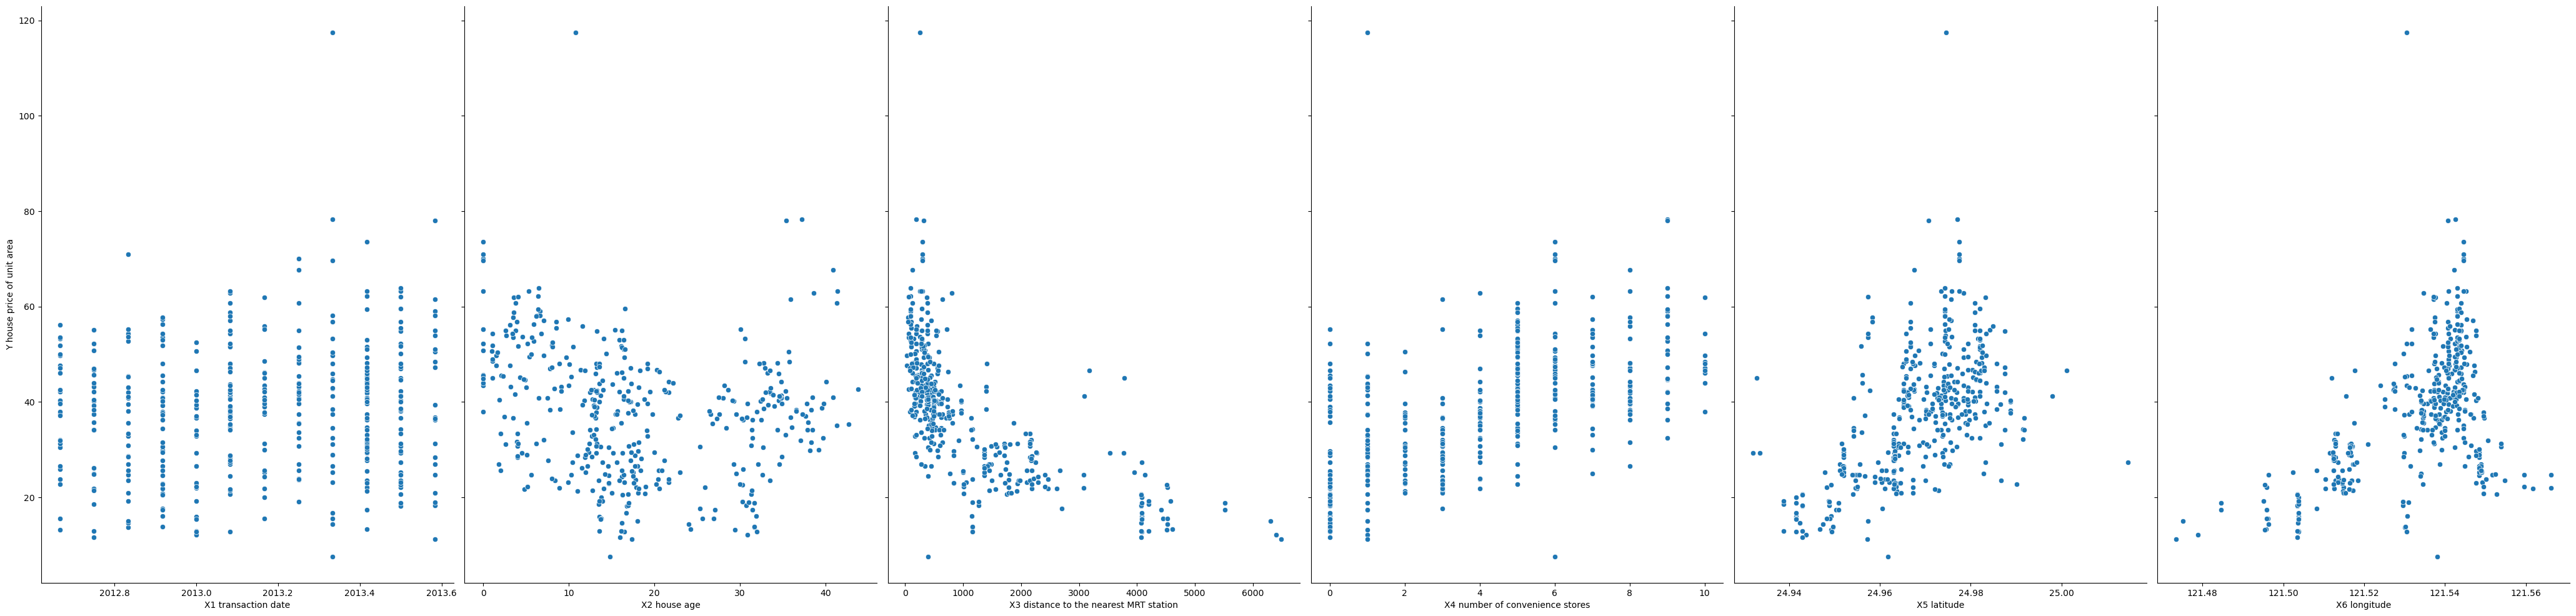

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = list(data.columns)

sns.pairplot(data, x_vars=cols[:-1], y_vars='Y house price of unit area',height=10, aspect=0.7, kind='scatter')
plt.show
# for i in range(6):
#     print(f"")
#     plt.scatter(x=data.iloc[:, i], y=data.loc[:, "Y house price of unit area"], )
#     plt.xlabel(cols[i])
#     plt.ylabel(cols[-1])
#     plt.show()

In [73]:
# clean data that is not usefull for prediction
data = data.drop(["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores"],axis=1)
# show data
data.head()

,X5 latitude,X6 longitude,Y house price of unit area
0,24.98298,121.54024,37.9
1,24.98034,121.53951,42.2
2,24.98746,121.54391,47.3
3,24.98746,121.54391,54.8
4,24.97937,121.54245,43.1


In [74]:
#convert dataframe to numpy array
data = data.to_numpy(dtype=np.float64)

# add all but last column to array - independent variables (x)
x = data[:, :-1]
x
# add last column to array - dependent variable (y)
y = data[:, -1]


In [75]:
weights = linear_regression(x, y, learning_rate=0.000001, epsilon=0.9)
weights

/var/folders/k8/s914kb5x6gg509bppy84_kg40000gn/T/ipykernel_29339/1023732925.py:34: RuntimeWarning: overflow encountered in square
  norm = np.sum(np.sqrt(np.square(part_deriv)))
/var/folders/k8/s914kb5x6gg509bppy84_kg40000gn/T/ipykernel_29339/1023732925.py:30: RuntimeWarning: overflow encountered in matmul
  part_deriv = regr.T @ (y - prediction_y)
/var/folders/k8/s914kb5x6gg509bppy84_kg40000gn/T/ipykernel_29339/1023732925.py:37: RuntimeWarning: invalid value encountered in add
  weights = weights.T + (learning_rate * part_deriv)
/var/folders/k8/s914kb5x6gg509bppy84_kg40000gn/T/ipykernel_29339/1023732925.py:39: UserWarning: diverged
  warn('diverged')


array([nan, nan, nan])

In [76]:
test_x = 10 #@param {type: "int"}
print(f"price per square unit: {predict_y([10], weights=weights)}")


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)